<a href="https://colab.research.google.com/github/AliAramideh/Classification_cell_samples_dataset/blob/main/Classification_cell_samples_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

---

In The Name Of God
<center>

# Author: **Ali Aramideh**

# Classification

## Import needed packages

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, f1_score, jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Underestanding the Dataset

### Load the data

In [61]:
url = 'https://github.com/AliAramideh/Classification_cell_samples_dataset/raw/main/cell_samples.csv'
dataset = pd.read_csv(url)
dataset

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [62]:
dataset['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### About the dataset

<h2 id="load_dataset">Load the Cancer data</h2>
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Let's look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

<Axes: xlabel='Clump', ylabel='UnifSize'>

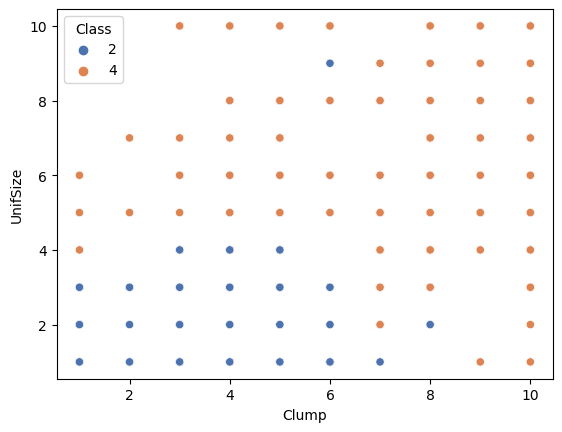

In [63]:
sns.scatterplot(data=dataset, x='Clump', y='UnifSize', hue='Class', palette='deep')

### Data pre-processing and selection

Let's first look at columns data types:


It looks like the BareNuc column includes some values that are not numerical. We can drop those rows:

In [64]:
dataset.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [65]:
dataset = dataset[pd.to_numeric(dataset['BareNuc'], errors='coerce').notnull()]

In [66]:
dataset['BareNuc'] = dataset['BareNuc'].astype('int')
dataset.dtypes

<ipython-input-66-81ea9e6e7237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['BareNuc'] = dataset['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Let's define X and y

In [67]:
X = dataset.drop(columns=['Class'])
X.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


In [68]:
y = dataset['Class']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [69]:
print(X.shape)
print(y.shape)

(683, 10)
(683,)


### Split dataset(train/test)

In [70]:
# from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)
print('The shape of train set of X: ', train_X.shape)
print('The shape of test set of X: ', test_X.shape)
print('The shape of train set of y: ', train_y.shape)
print('The shape of test set of y: ', test_y.shape)

The shape of train set of X:  (546, 10)
The shape of test set of X:  (137, 10)
The shape of train set of y:  (546,)
The shape of test set of y:  (137,)


## SVM

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.


### Modeling

In [71]:
# from sklearn import svm

model_svm = svm.SVC() # kernel diffult is 'rbf'
model_svm.fit(train_X, train_y)

SVC()

### Predicting

In [72]:
pred_y_svm = model_svm.predict(test_X)
print(test_y.values[0:5])
print(pred_y_svm[0:5])

[2 4 2 4 2]
[2 2 2 2 2]


### Evaluation

In [73]:
# from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_y, pred_y_svm, labels=[2,4]))

[[90  0]
 [47  0]]


In [74]:
# from sklearn.metrics import classification_report

print(classification_report(test_y, pred_y_svm))

              precision    recall  f1-score   support

           2       0.66      1.00      0.79        90
           4       0.00      0.00      0.00        47

    accuracy                           0.66       137
   macro avg       0.33      0.50      0.40       137
weighted avg       0.43      0.66      0.52       137



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# from sklearn.metrics import f1_score

print('F1 Score: %.2f' % f1_score(test_y, pred_y_svm, average='weighted'))

F1 Score: 0.52


In [76]:
# from sklearn.metrics import jaccard_score
jaccard_score_svm = jaccard_score(test_y, pred_y_svm, pos_label=2)
print('Jaccard Score: %.2f' % jaccard_score_svm)

Jaccard Score: 0.66


In [77]:
accuracy_score_svm = accuracy_score(test_y, pred_y_svm)
print('Accuracy Score: ', accuracy_score_svm)

Accuracy Score:  0.656934306569343


## K-Nearest Neighbors(KNN)

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">



In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.

### Modeling, predicting and Evaluation

#### Import library

Classifier implementing the k-nearest neighbors vote.


In [78]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

In [79]:
ks = 15
mean_acc = []

for k in range(1, ks+1):

  # Training
  model_knn = KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(train_X, train_y)

  # Predicting
  pred_y_knn = model_knn.predict(test_X)

  # Evaluating
  mean_acc.append(accuracy_score(test_y, pred_y_knn))

mean_acc = np.array(mean_acc)
print('The best number of neghbers(K) is:', mean_acc.argmax()+1, 'with accuracy value', mean_acc.max())

The best number of neghbers(K) is: 12 with accuracy value 0.6934306569343066


In [80]:
# training
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(train_X, train_y)

# prediction
pred_y_knn = model_knn.predict(test_X)

accuracy_score_knn = accuracy_score(test_y, pred_y_knn)
jaccard_score_knn = jaccard_score(test_y, pred_y_knn, pos_label=2)
print('Accuracy Score: ', accuracy_score_knn)
print('Jaccard Score: ', jaccard_score_knn)

Accuracy Score:  0.6715328467153284
Jaccard Score:  0.6511627906976745


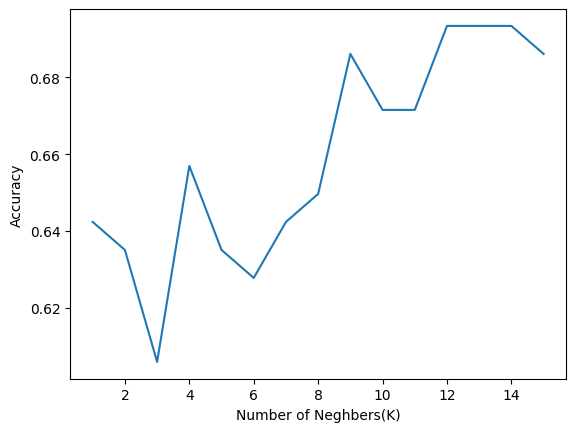

In [81]:
plt.plot(range(1, ks+1), mean_acc)
plt.xlabel('Number of Neghbers(K)')
plt.ylabel('Accuracy')
plt.show()

## Logistic Regression

### What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ\_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}}
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

The objective of the **Logistic Regression** algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.


### Modeling

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.
Now let's fit our model with train set:


In [82]:
# from sklearn.linear_model import LogisticRegression

model_log_reg = LogisticRegression(C= 0.1, solver= 'liblinear').fit(train_X, train_y)

In [83]:
pred_y_log_reg = model_log_reg.predict(test_X)

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [84]:
pred_y_log_reg_prob = model_log_reg.predict_proba(test_X)
print(test_y.values[0:5])
print(pred_y_log_reg[0:5])
print(pred_y_log_reg_prob[0:5])

[2 4 2 4 2]
[2 2 2 2 2]
[[0.61141022 0.38858978]
 [0.69038996 0.30961004]
 [0.67065442 0.32934558]
 [0.66708903 0.33291097]
 [0.67177649 0.32822351]]


In `predict_proba` method, the first column represents the probability of the negative class and the second column represents the probability of the positive class.

### Evaluation

#### jaccard index

Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [85]:
# from sklearn.metrics import jaccard_score
jaccard_score_log_reg = jaccard_score(test_y, pred_y_log_reg, pos_label=2)
print('Jaccard Score: ', jaccard_score_log_reg)

Jaccard Score:  0.656934306569343


In [86]:
accuracy_score_log_reg = accuracy_score(test_y, pred_y_log_reg)
print('Accuracy Score: ', accuracy_score_log_reg)

Accuracy Score:  0.656934306569343


In [87]:
# from sklearn.metrics import classification_report

print(classification_report(test_y, pred_y_log_reg))

              precision    recall  f1-score   support

           2       0.66      1.00      0.79        90
           4       0.00      0.00      0.00        47

    accuracy                           0.66       137
   macro avg       0.33      0.50      0.40       137
weighted avg       0.43      0.66      0.52       137



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

### Modeling

In [88]:
# from sklearn.tree import DecisionTreeClassifier

In [89]:
model_decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=20)
model_decision_tree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

### Prediction

In [90]:
pred_y_decision_tree = model_decision_tree.predict(test_X)

### Evaluation

In [91]:
# from sklearn.metrics import accuracy_score

accuracy_score_decision_tree = accuracy_score(test_y, pred_y_decision_tree)
print('Accuracy Score: ', accuracy_score_decision_tree)

Accuracy Score:  0.9708029197080292


In [92]:
jaccard_score_decision_tree = jaccard_score(test_y, pred_y_decision_tree, pos_label=2)
print('Jaccard Score:', jaccard_score_decision_tree)

Jaccard Score: 0.9565217391304348


## Comparing

In [93]:
# accuracy = {'SVM': [accuracy_score_svm, jaccard_score_svm],
#             'KNN': [accuracy_score_knn, jaccard_score_knn],
#             'LogReg': [accuracy_score_log_reg, jaccard_score_log_reg],
#             'Decision Tree': [accuracy_score_decision_tree, jaccard_score_decision_tree]}
# index = ['Accuracy Score', 'Jaccard Score']
accuracy = {'Accuracy Score': [accuracy_score_svm, accuracy_score_knn, accuracy_score_log_reg, accuracy_score_decision_tree],
            'Jaccard Score': [jaccard_score_svm, jaccard_score_knn, jaccard_score_log_reg, jaccard_score_decision_tree]}
index = ['SVM', 'KNN', 'LogReg', 'DecisionTree']
compare_df = pd.DataFrame(data=accuracy, index=index)
compare_df

,Accuracy Score,Jaccard Score
SVM,0.656934,0.656934
KNN,0.671533,0.651163
LogReg,0.656934,0.656934
DecisionTree,0.970803,0.956522


In [98]:
compare_df.loc[compare_df.idxmax()]

,Accuracy Score,Jaccard Score
DecisionTree,0.970803,0.956522
DecisionTree,0.970803,0.956522


As you see decision tree method have the best accuracy to classification of this dataset.